<a href="https://colab.research.google.com/github/Oz-art/Leaf-Classification/blob/master/leaf_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/dataset/

/content/drive/.shortcut-targets-by-id/1rSH6TO8vo9ZBtgp9IawCTkiXdv2Yj-DC/dataset


In [3]:
ls

GMB_01/  GMB_03/  GMB_05/  GMB_07/  GMB_09/  GMB_11/
GMB_02/  GMB_04/  GMB_06/  GMB_08/  GMB_10/  nonGMB/


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
from imutils import paths
import numpy as np
import os
import tensorflow as tf
import random

In [5]:
!mkdir "/content/used_dataset"

mkdir: cannot create directory ‘/content/used_dataset’: File exists


In [6]:
!cp -av GMB_06 GMB_07 GMB_08 GMB_09 GMB_10 "/content/used_dataset"

'GMB_06/IMG_20200814_133710_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133710_HDR.jpg'
'GMB_06/IMG_20200814_133822_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133822_HDR.jpg'
'GMB_06/IMG_20200814_133857_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133857_HDR.jpg'
'GMB_06/IMG_20200814_133932_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133932_HDR.jpg'
'GMB_06/IMG_20200814_133954_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133954_HDR.jpg'
'GMB_06/IMG_20200814_134044_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134044_HDR.jpg'
'GMB_06/IMG_20200814_134222_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134222_HDR.jpg'
'GMB_06/IMG_20200814_134321_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134321_HDR.jpg'
'GMB_06/IMG_20200814_134411_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134411_HDR.jpg'
'GMB_06/IMG_20200814_134512_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134512_HDR.jpg'
'GMB_06/IM

In [7]:
%cd "/content"

/content


In [8]:
!pwd

/content


In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("used_dataset")
data = []
labels = []

[INFO] loading images...


In [10]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [11]:
labels

['GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',

In [12]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [13]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [14]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [15]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(441, 224, 224, 3)
(147, 224, 224, 3)


In [16]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(5, activation ='softmax')(x)

In [18]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [19]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [20]:
for layer in model.layers[:175]:
  layer.trainable = False
for layer in model.layers[175:]:
  layer.trainable = True

In [21]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_Resnet50.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [22]:
# train the model using the Adam optimizer
print("[INFO] training network...")
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200, batch_size=32, callbacks=[checkpoint])
# model.fit(...)

[INFO] training network...
Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 1.7774 - accuracy: 0.2086
Epoch 00001: val_accuracy improved from -inf to 0.28571, saving model to best_weight_scene_Resnet50.h5
14/14 [==============================] - 4s 261ms/step - loss: 1.7774 - accuracy: 0.2086 - val_loss: 1.6040 - val_accuracy: 0.2857
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 1.6292 - accuracy: 0.2086
Epoch 00002: val_accuracy did not improve from 0.28571
14/14 [==============================] - 2s 121ms/step - loss: 1.6292 - accuracy: 0.2086 - val_loss: 1.6478 - val_accuracy: 0.1633
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 1.6088 - accuracy: 0.2063
Epoch 00003: val_accuracy did not improve from 0.28571
14/14 [==============================] - 2s 118ms/step - loss: 1.6088 - accuracy: 0.2063 - val_loss: 1.6255 - val_accuracy: 0.1769
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 1.6024 - accu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


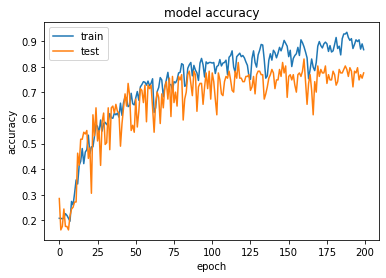

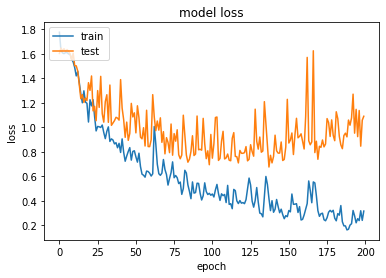

In [23]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_06       0.74      0.54      0.62        26
      GMB_07       0.75      0.92      0.83        26
      GMB_08       0.66      0.86      0.75        29
      GMB_09       0.81      0.88      0.84        24
      GMB_10       0.94      0.71      0.81        42

    accuracy                           0.78       147
   macro avg       0.78      0.78      0.77       147
weighted avg       0.79      0.78      0.77       147



In [25]:
model.save('nnmodel_leaf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_leaf/assets
